In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

In [28]:
#Importing dataset

df= pd.read_csv('Data Set 1.csv')

df.head()

,Date,Financial Year,Chain,Country,State,Manager,Category,Buyer,Sales in Rs,Unnamed: 9
0,01-01-2016,2015/16,Fashions Direct,India,Odisha,Jeremy Garcia,Home,Richard Carr,479.02,NaN
1,01-01-2016,2015/16,Fashions Direct,India,Odisha,Jeremy Garcia,Juniors,Chester George,149.95,NaN
2,01-01-2016,2015/16,Fashions Direct,India,Odisha,Jeremy Garcia,Mens,Bruce Curran,14.00,NaN
3,01-01-2016,2015/16,Fashions Direct,India,Odisha,Jeremy Garcia,Juniors,Chester George,12.00,NaN
4,01-01-2016,2015/16,Fashions Direct,India,Odisha,Jeremy Garcia,Womens,Amy Buchanan,46.94,NaN


In [29]:
df.shape

(1048575, 10)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            72425 non-null  object 
 1   Financial Year  72425 non-null  object 
 2   Chain           72425 non-null  object 
 3   Country         72425 non-null  object 
 4   State           72425 non-null  object 
 5   Manager         72425 non-null  object 
 6   Category        72425 non-null  object 
 7   Buyer           72425 non-null  object 
 8   Sales in Rs     72425 non-null  object 
 9   Unnamed: 9      0 non-null      float64
dtypes: float64(1), object(9)
memory usage: 80.0+ MB


In [ ]:
#Dataset contains Date, Financial Year, Chain, Country, State, Manager, Category, Buyer, Sales in Rs & Unnamed column.
#Unnamed : 9 having null values hence it is better to drop from dataset.

In [31]:
df.drop(['Unnamed: 9'], axis=1, inplace =True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            72425 non-null  object
 1   Financial Year  72425 non-null  object
 2   Chain           72425 non-null  object
 3   Country         72425 non-null  object
 4   State           72425 non-null  object
 5   Manager         72425 non-null  object
 6   Category        72425 non-null  object
 7   Buyer           72425 non-null  object
 8   Sales in Rs     72425 non-null  object
dtypes: object(9)
memory usage: 72.0+ MB


In [33]:
#Finding null values

df.isna().sum()

Date              976150
Financial Year    976150
Chain             976150
Country           976150
State             976150
Manager           976150
Category          976150
Buyer             976150
Sales in Rs       976150
dtype: int64

In [ ]:
#Null values are same in all values hence needs to remove from dataset

In [34]:
df=df.dropna()

In [35]:
#After dropping no null values present in dataset.

df.isna().sum()

Date              0
Financial Year    0
Chain             0
Country           0
State             0
Manager           0
Category          0
Buyer             0
Sales in Rs       0
dtype: int64

In [36]:
#Finding data type of 'Sales in Rs' & Replacing the whitespaces & special characters from dataset to convert into float.
df["Sales in Rs"].info()

<class 'pandas.core.series.Series'>
Int64Index: 72425 entries, 0 to 72424
Series name: Sales in Rs
Non-Null Count  Dtype 
--------------  ----- 
72425 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [37]:
df["Sales in Rs"]=df["Sales in Rs"].str.replace(' -   ','')

In [38]:
df["Sales in Rs"]=df["Sales in Rs"].str.replace(',','')

In [39]:
df["Sales in Rs"]=df["Sales in Rs"].str.replace(' ','')

In [40]:
#Filling the empty values with NAN

df['Sales in Rs']=df['Sales in Rs'].replace("",np.nan)

In [41]:
df["Sales in Rs"].isna().sum()

130

In [42]:
#After filling null values it observed that 130 nos. are still null values in dataset. 
#As our dataset is big hence is is better to remove or drop the null data from dataset.
#Dropping the null values is not solution we can fill it but if dataset is big then we can fill the null values.

df["Sales in Rs"]=df["Sales in Rs"].dropna()

In [43]:
#Converting data type of 'Sales in Rs' from 'Object' to 'Float'

df["Sales in Rs"]=df["Sales in Rs"].astype(float)

In [44]:
#Replacing/Renaming the states names.

df['State'].replace({'Orissa':'Odisha'}, inplace =True)

df['State'].replace({'MP':'Madhya Pradesh'}, inplace =True)

In [45]:
df.describe()

,Sales in Rs
count,72295.000000
mean,753.603799
std,1228.188124
min,-119.940000
25%,41.930000
50%,224.320000
75%,915.935000
max,18761.580000


# Show State-wise sales by year in Rs. lakhs

In [65]:
df.groupby(['State','Financial Year'])['Sales in Rs'].sum()

State           Financial Year
Bihar           2015/16            3721793.79
                2016/17            8850768.25
                2017/18             622686.78
Goa             2015/16            3309198.87
                2016/17            7141150.25
                2017/18             431281.61
Jharkhand       2015/16             183238.25
                2016/17             390547.59
                2017/18              26806.69
Madhya Pradesh  2015/16             613250.72
                2016/17            1306436.10
                2017/18              76400.71
Nagaland        2015/16             352270.15
                2016/17             778426.30
                2017/18              46977.53
Odisha          2015/16            5796474.39
                2016/17           13232431.99
                2017/18             866881.25
Punjab          2015/16            1437458.69
                2016/17            3924077.45
                2017/18             308404.50
Utt

# Prepare a pictorial representation of the Q1 in PowerPoint (1 slide)

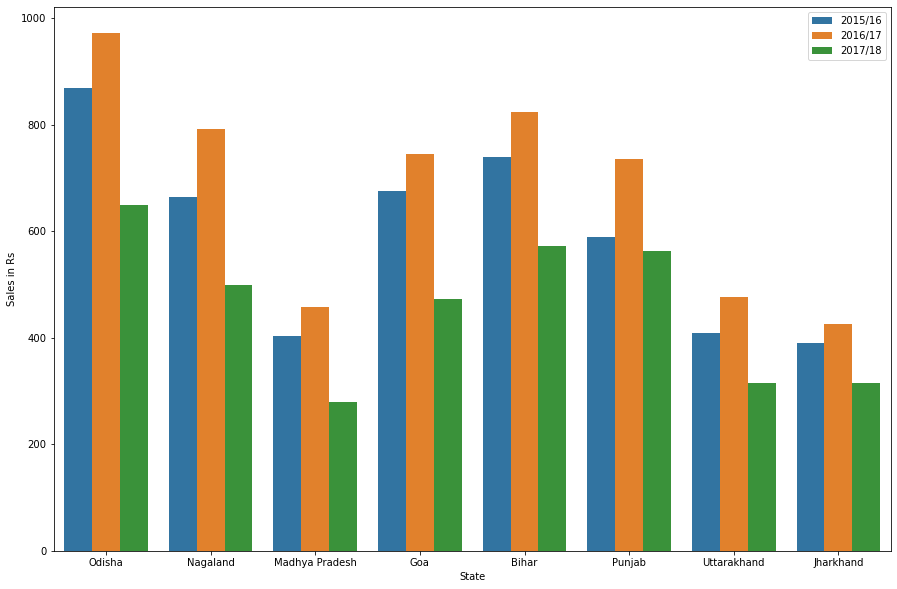

In [47]:
plt.figure(figsize=(15,10))

sns.barplot(x='State', y='Sales in Rs', data=df, hue='Financial Year',ci=None)
plt.legend(loc="upper right",fontsize="10")
plt.show()

In [ ]:
#Analysis:-

# In the year of 2026/17 every state sales are higher as compared to other financial year.
#Sales are higher is odisha followed by Bihar & Nagaland in the financial year 2016/17.
#Followed by finanacial year 2015/16 sales are good.
#In Financial year 2017/18 sales figures are not good.

# 3.Please show the Manager's ranking as per sales (1 – 10)

In [48]:
df1=df.groupby(['Manager'])['Sales in Rs'].sum().sort_values(ascending=False)
df1.head(10)

Manager
John Gardner      5029314.86
Jeremy Garcia     4618775.85
Lillian Pruitt    4504438.82
Rachael Long      4326676.91
Jerry Fulton      4230480.95
Terri Wright      3520068.93
George Chester    3492580.14
Brian Hubbard     3474647.43
Miles Hammond     2904742.88
Claire Bridges    2851270.49
Name: Sales in Rs, dtype: float64

In [ ]:
#Above details shows top 10 managers sales from higher rank to lower rank.

# 4.Show the highest-to-lowest sales categories by state.

In [62]:
df.groupby(['State','Category'])['Sales in Rs'].sum().sort_values(ascending=False)


State           Category 
Odisha          Mens         3700053.93
                Shoes        3106748.80
                Home         2823200.68
Bihar           Mens         2575784.23
Odisha          Juniors      2550584.54
                                ...    
Uttarakhand     Hosiery        24057.40
Jharkhand       Groceries      17021.33
                Hosiery        16501.90
Madhya Pradesh  Groceries        692.04
Uttarakhand     Groceries        464.15
Name: Sales in Rs, Length: 80, dtype: float64

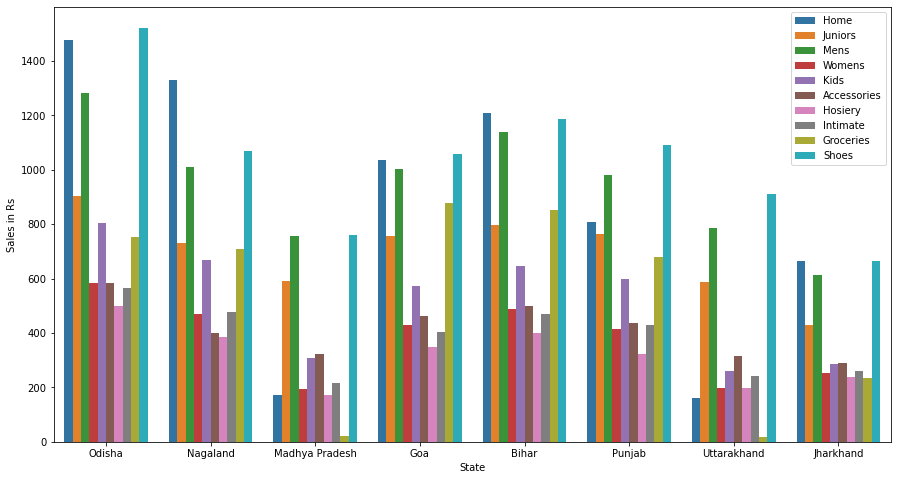

In [63]:
plt.figure(figsize=(15,8))

sns.barplot(x='State', y='Sales in Rs', data=df, hue='Category',ci=None)
plt.legend(loc="upper right",fontsize="10")
plt.show()

In [ ]:
#Analysis:-

#From above anaysis it is observed that sales of shoes is highest in odisha amoungst all states, followed by Bihar, Goa & Nagaland.
#Also Home fashion category sale in highest in odisha, followed by nagaland & Bihar.
#Mens fashion accessories are mostly sale in odisha followed by Bihar, Goa & Punjab.

#Groceries sales are performing well in all states but in Madhya Pradesh, Uttarakhand sales are very less.Hence needs to focus on this states.
#Madhyapradesh, Jharkhand & uttarakhand sales are not good hence need to focus on this region to increase the sales.